In [1]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

import pandas as pd
import re

In [2]:
from konlpy.tag import Hannanum
from urllib.request import urlopen
from lxml import html
from collections import Counter
import nltk

import random
import pytagcloud      # requires Korean font support
import webbrowser

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
word = pd.read_csv('./teample_1/hankyure_policy_utf.csv', sep=',', encoding='utf-8')
word

,Unnamed: 0,날짜,제목
0,0,2018-11-13,‘예결위 소위 누가 들어가냐’로 왜 난리냐고요?
1,1,2018-11-13,"김성태·김관영 “문 대통령, 돌려막기 인사 사과해야”"
2,2,2018-11-13,"민주당 “손학규, ‘저녁 있는 삶’ 주장하더니 왜 소신 바꿨나”"
3,3,2018-11-13,"청와대 “북, 미사일 기지 폐기 약속한 적 없다” NYT 보도 반박"
4,4,2018-11-13,"이낙연, 2009년 이전 고시원 등 ‘스프링클러 의무화’ 검토 지시"
5,5,2018-11-13,"이언주, 정체성 지적에 “나는 반문…손학규 대표는 친문인가?”"
6,6,2018-11-12,"시간끌기, 물타기…자유한국당에 가로막힌 ‘박용진 3법’"
7,7,2018-11-12,"민주당, 기업인 100명과 다음달 방북 추진한다"
8,8,2018-11-12,"뉴욕타임스 “북한, 비밀 기지서 탄도미사일 계속 개발” 보도"
9,9,2018-11-12,한-미 미사일 지침 개정 논의…‘민간용 고체연료’ 제한 풀리나


In [4]:
xyz = list(word['제목'])

In [5]:
words = str()

for i in range(len(xyz)):
    words += xyz[i]

words

'‘예결위 소위 누가 들어가냐’로 왜 난리냐고요?김성태·김관영 “문 대통령, 돌려막기 인사 사과해야”민주당 “손학규, ‘저녁 있는 삶’ 주장하더니 왜 소신 바꿨나”청와대 “북, 미사일 기지 폐기 약속한 적 없다” NYT 보도 반박이낙연, 2009년 이전 고시원 등 ‘스프링클러 의무화’ 검토 지시이언주, 정체성 지적에 “나는 반문…손학규 대표는 친문인가?”시간끌기, 물타기…자유한국당에 가로막힌 ‘박용진 3법’민주당, 기업인 100명과 다음달 방북 추진한다뉴욕타임스 “북한, 비밀 기지서 탄도미사일 계속 개발” 보도한-미 미사일 지침 개정 논의…‘민간용 고체연료’ 제한 풀리나한국당 폭로전 비화 ‘김전투구’…식물 비대위로 가나청와대, 채용·학사비리 등 ‘생활적폐’ 청산 나선다문 대통령, ‘아세안·아펙 정상회의’ 참석 위해 13일 출국김관영 “사립유치원, 일방적 몰아치기보다 자율성 존중해야”대우차 노조 출신 홍영표 “한국GM 노조, 견딜 수 없는 모욕감 줘”청와대, 새해 문 대통령 받은 국외 선물 전시회 연다인재난 들먹이며…홍영표 “주식백지신탁 손질해야”한국·바른미래 “여야정상설협의체 실무협상 참여 불가”육군, 비무장지대 감시초소 철거 시작김정은 위원장 방한 때 한라산 백록담에 헬기 착륙 가능할까이정미 “과일상자에 엉뚱한 물건 담는 건 자유한국당 전문”통일부, 북 고위급 대표단 방남 승인김정은 위원장 선물한 풍산개 새끼 낳아손학규, 이언주에 “정체성 분명히 하라” 공개 경고공군 첫 도입 ‘공중급유기’ 오늘 도착헌병 사라지고 군사경찰로 바뀐다전원책 폭로 기자회견 연다…한국당 ‘흙탕물 싸움’ 번지나판문점 선언 200일…남북합의 이행, 어디까지 왔나장하성 떠나자 김상조 통화음 노래 ‘잊지 말아요’로 바꿔홍준표 “귤상자에 귤만 있겠나” 바른미래 “그럼 뭐가 있겠냐”김수현 실장 “소득주도성장 수정 계획 없다”자유한국당 “경질된 부총리가 무슨 권한? 김수현 실장 나와라”“탄핵 반성해” “덩칫값해”…쇄신커녕 진흙탕 빠진 한국당홍준표 “북 보낸 귤 상자 속에 귤만 들어있다고 믿겠나”

### 트위터로 단어 뽑기

In [6]:
# from konlpy.tag import Hannanum
# from konlpy.tag import Kkma
# from konlpy.tag import Komoran
# from konlpy.tag import Mecab
from konlpy.tag import Twitter

In [7]:
twitter = Twitter()
nouns3 = twitter.nouns(words)
count3 = Counter(nouns3)

C:\Python\Anaconda3-52\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [8]:
tmp_wordsource_policy = count3.most_common()
# tmp_wordsource_society

### (중간)데이터프레임화하기

In [9]:
common_word_policy = pd.DataFrame({'정치단어' : count3.most_common()})

In [10]:
common_word_policy

,정치단어
0,"(대통령, 986)"
1,"(문, 722)"
2,"(북, 491)"
3,"(한국, 479)"
4,"(남북, 379)"
5,"(청와대, 287)"
6,"(회담, 277)"
7,"(김정은, 262)"
8,"(것, 222)"
9,"(홍준표, 218)"


### (중간)데이터프레임화한 것 저장

In [11]:
common_word_policy.to_csv('teample_1/common_word_policy_utf.csv', sep=',', encoding='utf-8')

In [12]:
common_word_policy.to_csv('teample_1/common_word_policy_euc.csv', sep=',', encoding='euc-kr')

## 단어 분류

In [13]:
one_words = []
tow_words = []
etc_words = []
for noun in nouns3:
    if len(noun) == 1:
        one_words.append(noun)
    elif len(noun) == 2:
        tow_words.append(noun)
    else:
        etc_words.append(noun)
        
len(one_words), len(tow_words), len(etc_words)

(7245, 28200, 10409)

In [14]:
one_words = list(set(one_words))
tow_words = list(set(tow_words))
etc_words = list(set(etc_words))

len(one_words), len(tow_words), len(etc_words)

(459, 4796, 2150)

In [15]:
for word in one_words:
    print(word, end='\t')

리	획	편	절	낮	륭	회	린	도	틀	팔	검	뼘	댁	부	말	앗	규	밑	판	총	항	실	트	컷	경	삥	택	연	파	락	독	안	누	풀	방	걸	문	꽤	은	류	데	날	론	돈	귀	코	차	꿀	종	뭣	쇼	융	억	욱	줄	봄	굴	임	꿈	산	식	세	선	준	액	메	뭘	바	망	과	색	러	턱	랩	겉	률	놀	찬	밥	옆	투	권	칙	워	생	빚	곤	객	행	짐	탓	요	탈	건	좌	군	콜	축	소	렵	겐	침	위	후	밤	숨	삶	잉	시	카	칼	빼	빛	끝	땅	딸	게	일	금	초	함	푼	더	견	터	첫	맨	최	씨	펜	앞	속	딜	박	태	닻	균	킹	란	업	홍	멍	합	비	답	잡	길	번	힘	반	겁	채	짝	거	불	인	범	등	체	몇	롱	샷	뭉	약	놈	청	백	삭	핵	심	끼	떼	응	댕	피	왜	띠	병	팬	나	휘	강	쥐	궁	숲	관	법	퇴	맛	키	밸	협	네	삼	몽	흙	머	뼈	목	잣	끌	면	달	젠	곧	묵	멸	골	물	곡	여	의	묘	폭	싹	령	점	별	율	용	괌	케	직	양	너	퍼	배	악	몫	웃	겹	온	해	뜻	빅	품	포	예	곪	료	분	현	중	록	팁	각	톱	훅	향	잠	개	재	살	짓	돌	효	를	윤	자	육	늘	봉	봇	꽃	운	만	쟁	곳	민	립	음	옥	상	움	냉	수	땀	확	혹	두	옷	글	밖	특	댐	환	평	넉	벗	팽	폼	통	롭	윗	창	던	둑	황	노	공	곁	애	화	콩	존	진	막	룰	꼽	모	땐	값	귤	염	새	정	뺨	명	형	표	감	며	뒤	콸	쿨	치	순	승	렀	처	톤	쾅	저	넋	국	알	당	꽉	손	기	폐	볼	오	고	쇄	성	찍	적	깜	버	둘	휙	마	보	매	혜	쑥	외	술	뻔	주	엄	뿔	드	역	그	또	뭐	좀	헛	사	끈	구	벽	내	집	로	전	광	김	호	듯	제	접	쌍	결	간	엘	패	션	유	작	쌀	겨	입	칠	닌	격	것	척	이	설	년	블	어	쪽	난	층	월	눈	원	복	장	죄	탑	급	쏠	계	득	덕	책	낼	디	팀	발	영	질	스	송	졸	몸	무	철	왕	깨	빈	뿐	북	을	곰	남	못	친	추	람	석	샤	맹	섬	낯	갑	때	단	열	논	담	량	꼭	

In [16]:
stop_words = []
# stop_words = ['제', '월', '일','조','수','때','그','이','바','및','안']
stop_words.extend(one_words)
len(stop_words)

459

In [17]:
# stop_words 빼기
policy_nouns = [word for word in nouns3 if word not in stop_words]
len(policy_nouns)

38609

In [18]:
policy_nouns[:10]

['결위', '소위', '누가', '난리', '고요', '김성태', '김관영', '대통령', '돌려막기', '인사']

In [19]:
policy  = nltk.Text(policy_nouns, name='사회기사')
type(policy), len(policy)

(nltk.text.Text, 38609)

In [20]:
policy.vocab().most_common(30)

[('대통령', 986),
 ('한국', 479),
 ('남북', 379),
 ('청와대', 287),
 ('회담', 277),
 ('김정은', 262),
 ('홍준표', 218),
 ('평화', 216),
 ('국회', 207),
 ('민주당', 205),
 ('대표', 190),
 ('평양', 188),
 ('북한', 177),
 ('선언', 177),
 ('포토', 168),
 ('자유', 165),
 ('정치', 157),
 ('의원', 156),
 ('정부', 153),
 ('정상회담', 152),
 ('판문점', 138),
 ('위원장', 128),
 ('합의', 127),
 ('안철수', 126),
 ('미래', 121),
 ('비핵화', 121),
 ('후보', 111),
 ('정상', 110),
 ('국민', 104),
 ('김성태', 103)]

## 워드클라우드 한글폰트 설정

In [21]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [22]:
data = policy.vocab().most_common(1000)
len(data)

1000

In [23]:
data[:10]

[('대통령', 986),
 ('한국', 479),
 ('남북', 379),
 ('청와대', 287),
 ('회담', 277),
 ('김정은', 262),
 ('홍준표', 218),
 ('평화', 216),
 ('국회', 207),
 ('민주당', 205)]

In [24]:
# data를 딕셔너리 형태로 변환
dict_data = dict(data)
len(dict_data)

1000

### 워드클라우드 그리기

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [26]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      background_color='white'
                     ,relative_scaling =0.2).generate_from_frequencies(dict_data)

(-0.5, 399.5, 199.5, -0.5)

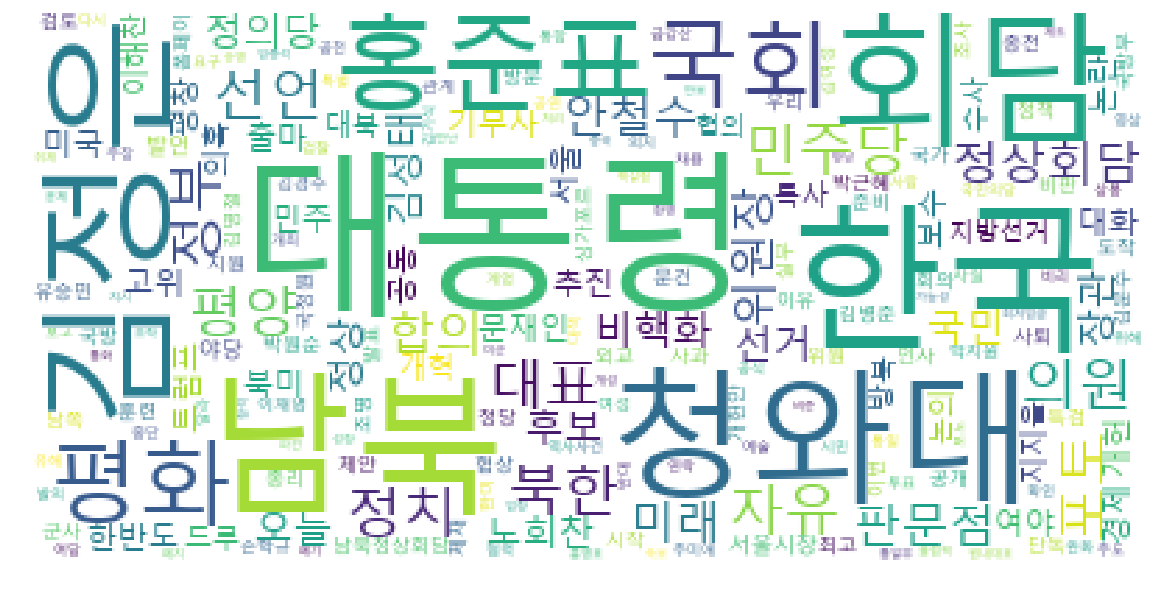

In [27]:
plt.figure(figsize=(20,12))
plt.imshow(wordcloud)
plt.axis('off')

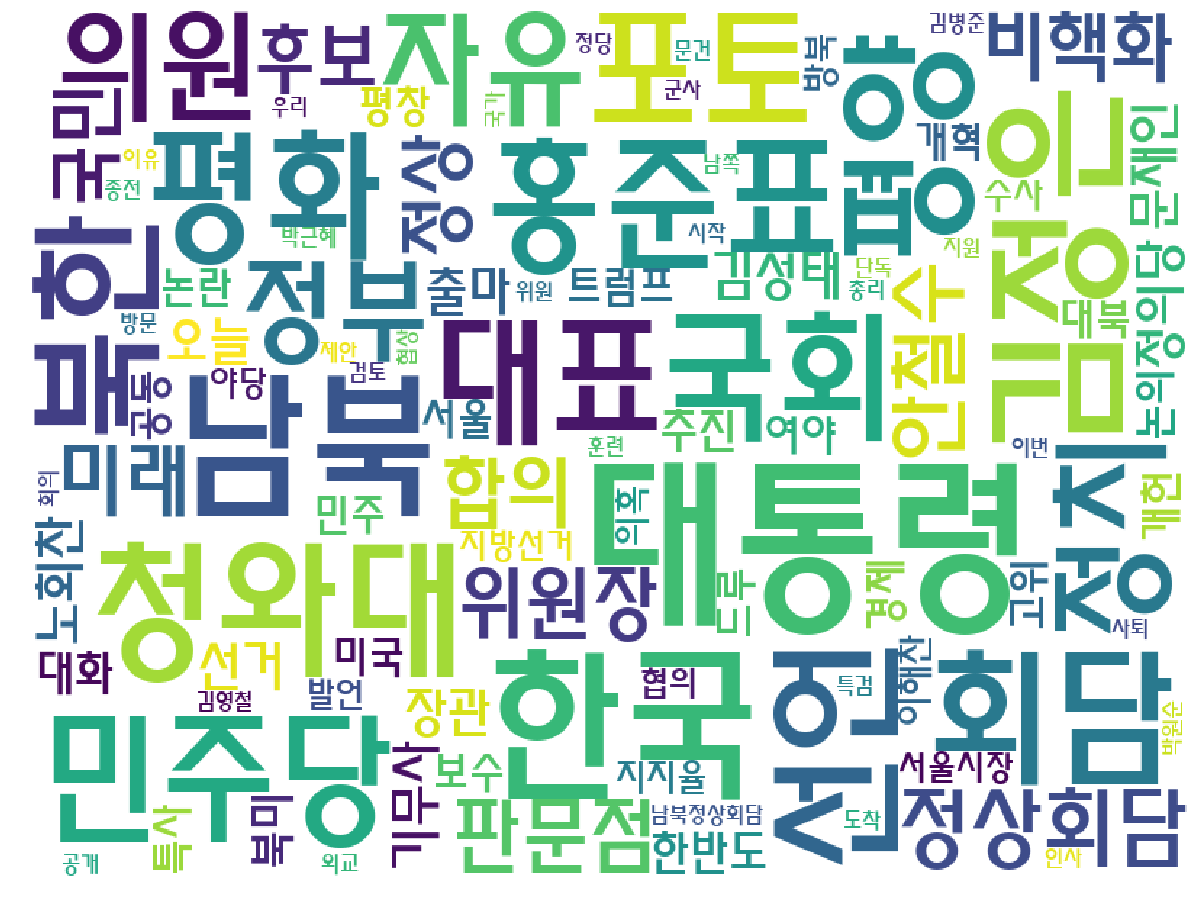

In [28]:
params = {
    "width"            : 800,
    "height"           : 600,
    "min_font_size"    : 2**3, 
    "max_font_size"    : 2**7, 
    "max_words"        : 100,
    "relative_scaling" : 0.2,
    # "font_path"        : 'C:/Windows/Fonts/malgun.ttf',
    "font_path"        : 'C:/Windows/Fonts/HMFMMUEX.TTC',
    "background_color" : 'white',
}

wordcolud = WordCloud(**params)
# wordcolud = wordcolud.generate(text) 
wordcolud = wordcolud.generate_from_frequencies(dict_data) 

save_img = 'teample_1_result/policy_1.png'

plt.figure(figsize=(24,16))
plt.imshow(wordcolud)
plt.axis('off')
plt.savefig(save_img)